In [3]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


In [5]:
CityDataFile="raw_data/city_data.csv"
Cities= pd.read_csv(CityDataFile)
Cities.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
RidesDataFile="raw_data/ride_data.csv"
Rides = pd.read_csv(RidesDataFile)
Rides.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
cityRide = pd.merge(Cities, Rides, on="city")
cityRide



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [8]:
urban_cities_df = cityRide[cityRide['type']=="Urban"]
suburban_cities_df = cityRide[cityRide["type"]=="Suburban"]
rural_cities_df = cityRide[cityRide["type"]=="Rural"]

urban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [9]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_fare=urban_cities_df.groupby(["city"]).sum()["fare"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_fare=suburban_cities_df.groupby(["city"]).sum()["fare"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_fare = rural_cities_df.groupby(["city"]).sum()["fare"]



In [10]:
TotalFare=cityRide["fare"].sum()

TotalRides=cityRide["ride_id"].count()

TotalDrivers=cityRide["driver_count"].count()



# Graph

<IPython.core.display.Javascript object>


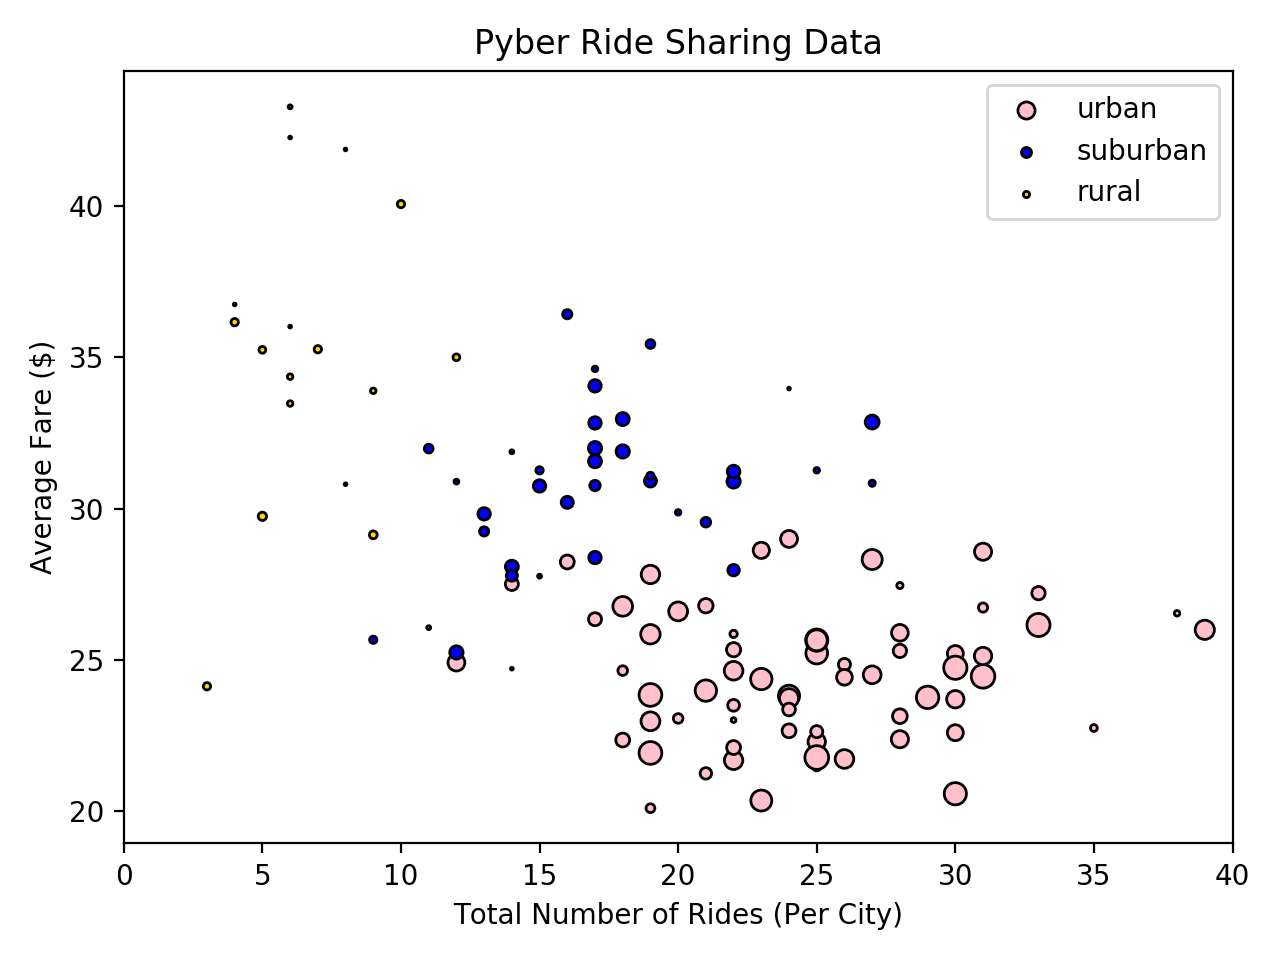

In [17]:
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count, marker="o", facecolor=["pink"], edgecolors="black", label="urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count, marker="o", facecolor=["blue"], edgecolors="black", label="suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count, marker="o", facecolor="gold", edgecolors="black", label="rural")
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0,40)
plt.tight_layout()
plt.legend()

plt.show()


In [12]:
# urban_type_percent = 100 * urban_fare/TotalFare
# print(urban_type_percent)
# suburban_type_percent = 100 * suburban_fare/TotalFare
# rural_type_percent = 100 * rural_fare/TotalFare

# Fares=["urban","suburban","rural"]
# Percentages=(urban_type_percent,suburban_type_percent,rural_type_percent)
# colors=["coral","blue","yellow"]
# explode = (0,0,0)

# plt.pie(Percentages, explode=explode, labels=Fares, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
# plt.axis("equal")
# plt.show()



      

In [13]:
farePie = cityRide.groupby(["type"])["fare"].sum()
farePie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
farePie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

<IPython.core.display.Javascript object>


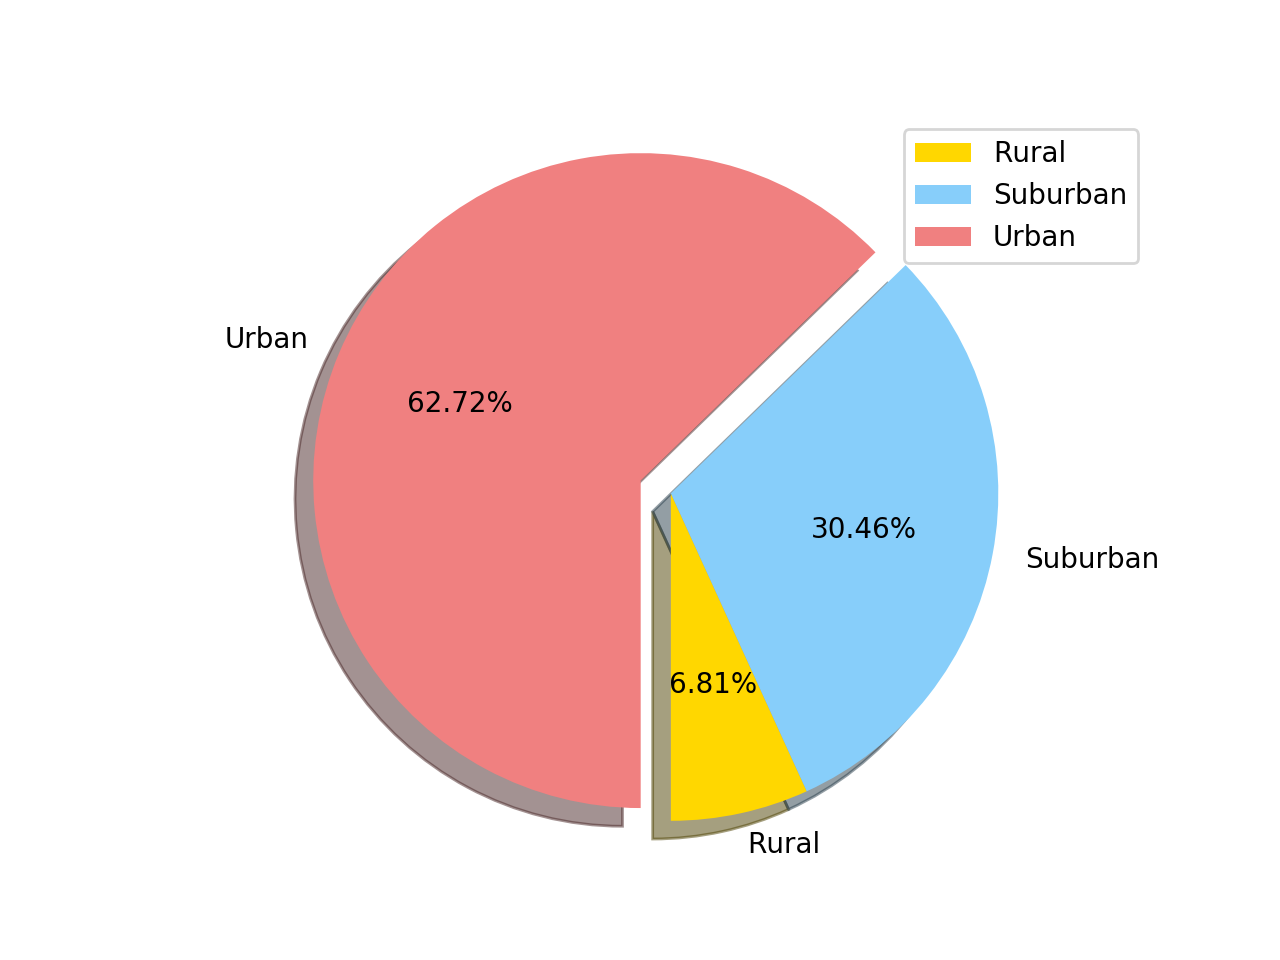

In [23]:
colors= ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

plt.pie(farePie, labels= farePie.index,autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.show()



In [18]:
ridePie = cityRide.groupby(["type"])["ride_id"].count()
ridePie



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

<IPython.core.display.Javascript object>


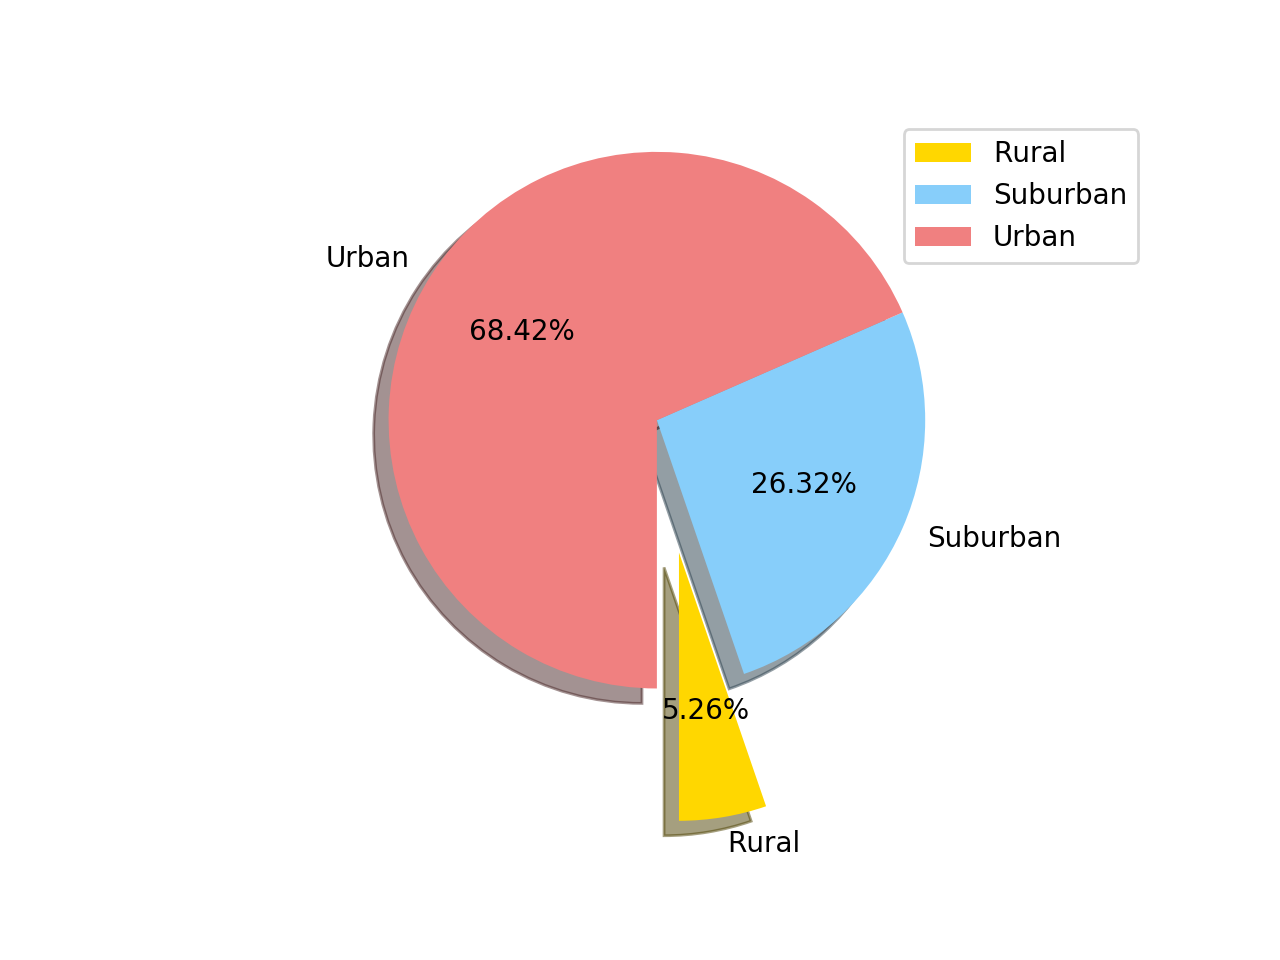

In [20]:
colors= ["gold","lightskyblue","lightcoral"]

explode = (0.5,0,0)

plt.pie(ridePie, labels= farePie.index,autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.show() 

In [21]:
driverPie = cityRide.groupby(["type"])["driver_count"].mean()
driverPie

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


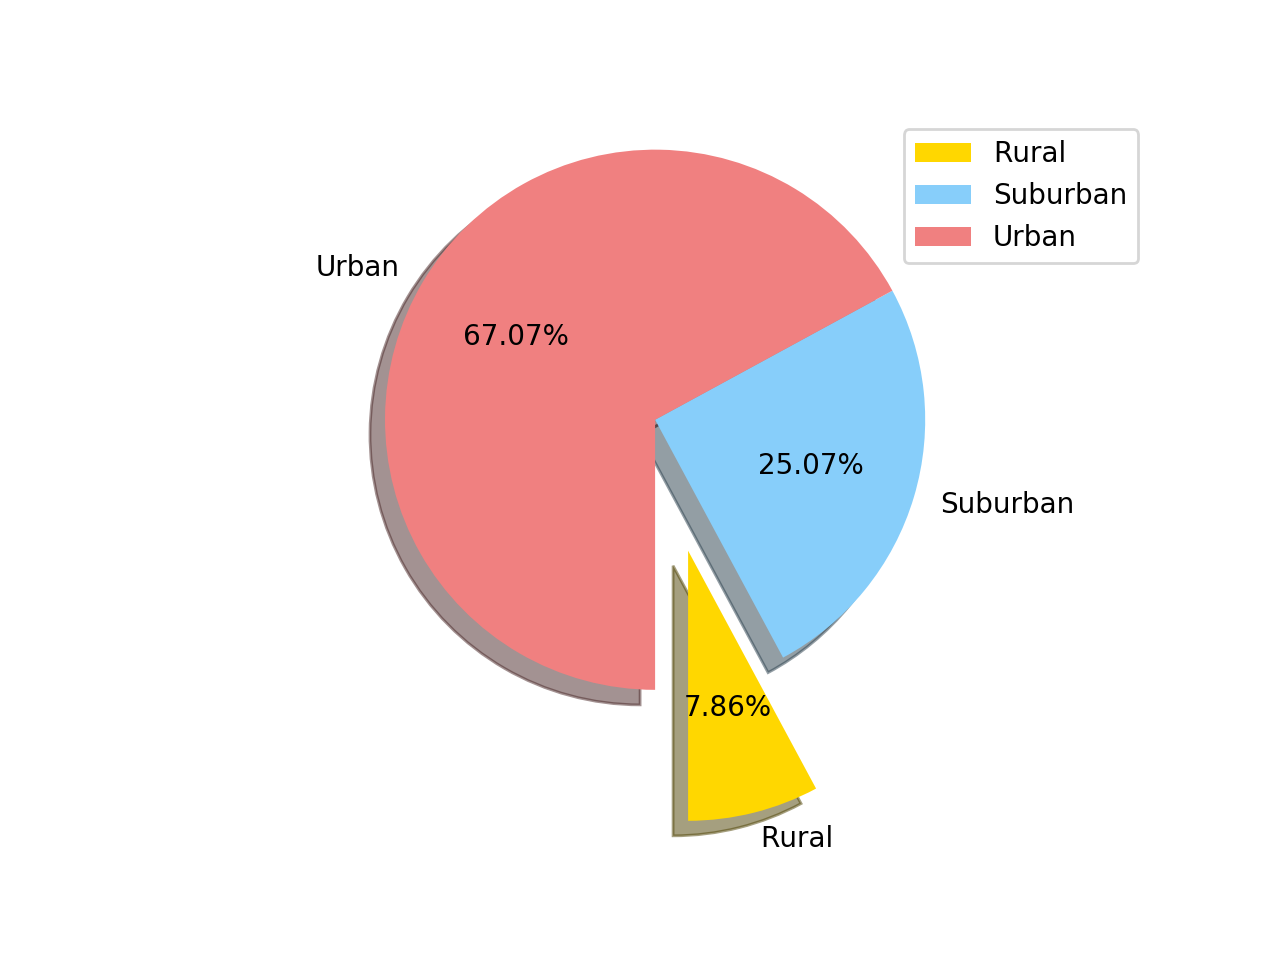

In [22]:
colors= ["gold","lightskyblue","lightcoral"]

explode = (0.5,0,0)

plt.pie(driverPie, labels= farePie.index,autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.show() 